In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
iris_data = pd.read_csv('IRIS.csv')

In [3]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='species', ylabel='count'>

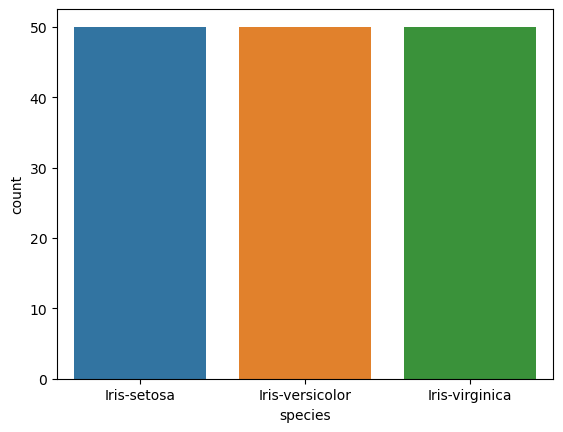

In [5]:
sns.countplot(data= iris_data,x='species')

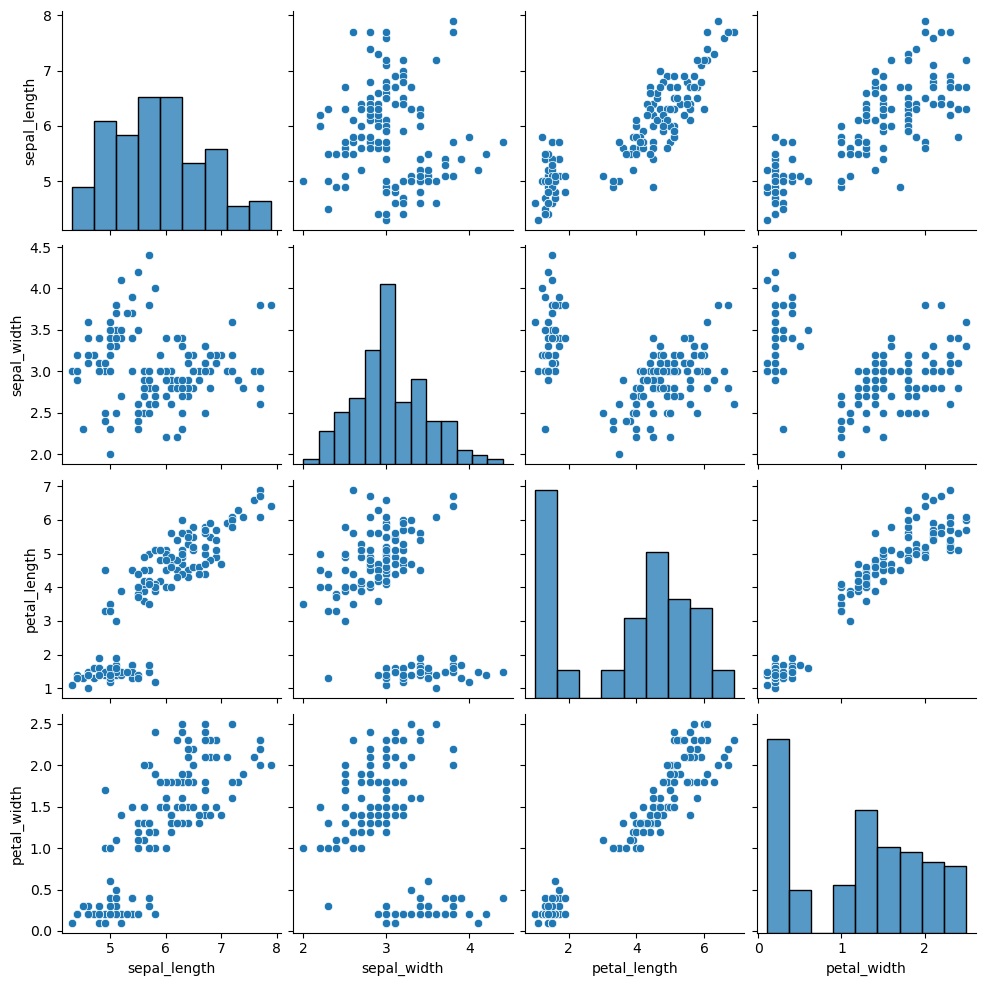

In [9]:
sns.pairplot(iris_data[['sepal_length','sepal_width','petal_length','petal_width']])

In [10]:
X = iris_data.drop('species',axis=1)
Y = iris_data['species']

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4) # Initialize the KNN classifier with a chosen value of K

In [13]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

In [14]:
predictions = knn.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(predictions,Y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.86      0.92        14
 Iris-virginica       0.75      1.00      0.86         6

       accuracy                           0.93        30
      macro avg       0.92      0.95      0.93        30
   weighted avg       0.95      0.93      0.94        30



In [16]:
confusion_matrix(Y_test,predictions)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  2,  6]], dtype=int64)

<Axes: >

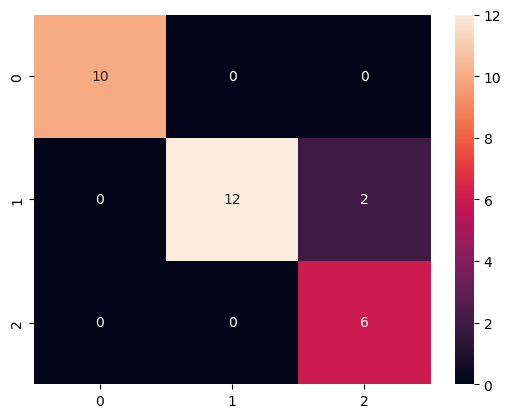

In [17]:
sns.heatmap(confusion_matrix(predictions,Y_test),annot=True)

In [18]:
predictions != Y_test

33     False
16     False
43     False
129    False
50     False
123     True
68     False
53     False
146     True
1      False
147    False
32     False
31     False
122    False
127    False
74     False
88     False
96     False
42     False
134    False
80     False
48     False
90     False
65     False
97     False
64     False
93     False
114    False
25     False
41     False
Name: species, dtype: bool

In [19]:
error_rate = []
for k in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(predictions != Y_test))

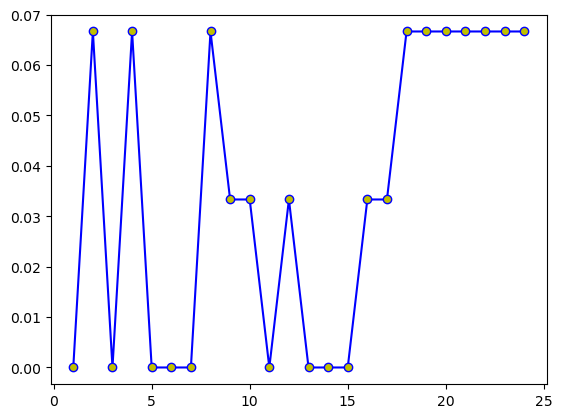

In [22]:
plt.plot(range(1,25),error_rate,marker='o',mfc='y' ,linestyle='-', color='blue')